In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

Importamos el dataset de cursos de coursera

In [3]:
cursos_coursera = pd.read_csv("./Datasets/Coursera_courses.csv")

Chequeamos con un .head() la compocision del dataset

In [4]:
cursos_coursera.head()

,name,institution,course_url,course_id
0,Machine Learning,Stanford University,https://www.coursera.org/learn/machine-learning,machine-learning
1,Indigenous Canada,University of Alberta,https://www.coursera.org/learn/indigenous-canada,indigenous-canada
2,The Science of Well-Being,Yale University,https://www.coursera.org/learn/the-science-of-...,the-science-of-well-being
3,Technical Support Fundamentals,Google,https://www.coursera.org/learn/technical-suppo...,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,https://www.coursera.org/learn/google-cbrs-cpi...,google-cbrs-cpi-training


Chequeamos la cantidad, nulos, tipo de datos con info()

In [5]:
cursos_coursera.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 623 entries, 0 to 622
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         623 non-null    object
 1   institution  623 non-null    object
 2   course_url   623 non-null    object
 3   course_id    623 non-null    object
dtypes: object(4)
memory usage: 19.6+ KB


Dropeamos la columna "course_url" ya que no nos va a servir para nuestro analisis

In [6]:
cursos_coursera.drop(columns="course_url",inplace=True)

Importamos el dataset de coursera_reviews

In [7]:
coursera_reviews = pd.read_csv("./Datasets/Coursera_reviews.csv")

Chequeamos su composicion con un .head()

In [8]:
coursera_reviews.head()

,Unnamed: 0,reviews,reviewers,date_reviews,rating,course_id
0,0,"Pretty dry, but I was able to pass with just t...",By Robert S,"Feb 12, 2020",4,google-cbrs-cpi-training
1,1,would be a better experience if the video and ...,By Gabriel E R,"Sep 28, 2020",4,google-cbrs-cpi-training
2,2,Information was perfect! The program itself wa...,By Jacob D,"Apr 08, 2020",4,google-cbrs-cpi-training
3,3,A few grammatical mistakes on test made me do ...,By Dale B,"Feb 24, 2020",4,google-cbrs-cpi-training
4,4,Excellent course and the training provided was...,By Sean G,"Jun 18, 2020",4,google-cbrs-cpi-training


Dropeamos la columna "Unnamed: 0" que se genera debido a que intenta implementar un "id"

In [9]:
coursera_reviews.drop(columns="Unnamed: 0",inplace=True)

Chequeamos cantidad, nulos, tipo de dato de cada columna con un .info()

In [10]:
coursera_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162950 entries, 0 to 1162949
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   reviews       1162950 non-null  object
 1   reviewers     1162950 non-null  object
 2   date_reviews  1162950 non-null  object
 3   rating        1162950 non-null  int64 
 4   course_id     1162950 non-null  object
dtypes: int64(1), object(4)
memory usage: 44.4+ MB


Hacemos una descripicion de la variable de tipo "int" llamada rating

In [11]:
coursera_reviews.describe()

,rating
count,1.162950e+06
mean,4.673347e+00
std,7.251819e-01
min,1.000000e+00
25%,5.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


Dropeamos nulos del dataset

In [12]:
coursera_reviews.dropna(inplace=True)

Chequeamos su tamaño

In [13]:
coursera_reviews.shape

(1162950, 5)

Revisamos como esta compuesta la columna reviews

In [14]:
coursera_reviews["reviews"]

0          Pretty dry, but I was able to pass with just t...
1          would be a better experience if the video and ...
2          Information was perfect! The program itself wa...
3          A few grammatical mistakes on test made me do ...
4          Excellent course and the training provided was...
                                 ...                        
1162945                 the hardest one but very interrsting
1162946                         Awesome course to take!!!!!!
1162947                         Awesome course to take!!!!!!
1162948                         Awesome course to take!!!!!!
1162949                                     The best ever !!
Name: reviews, Length: 1162950, dtype: object

Generamos un codigo que se fija cuando una review esta mal escrita gracias a la generacion de tokens por cada review. Luego, hacemos la suma de cada sustantivo y pronombre ya que, en este caso, considero a criterio personal que, si la division de cantidad de sustantivos por la cantidad de pronombres da menor a 0.5, la informacion escrita no es la suficiente como para tenerla en cuenta. Aquellos que sean menores al 0.5 se dropean.

In [15]:
# import nltk
# import re

# Descargamos los modulos que nos ayudaran a realizar este trabajo
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('vader_lexicon')

# Escribimos la funcion
# def mal_escrito(review): # Cada review en el dataset se tokeniza
#     tokens = nltk.word_tokenize(review)
  
#     if len(tokens) < 5: # Chequeamos si la cantidad de tokens en menor a 5, si es mayor a 5 se devuelve True y esa review no se analiza
#         return True
  
#     
#     tokens_tageados = nltk.pos_tag(tokens) # Tageamos cada token con su respectiva categoria gramatical (Sustantivo, Adjetivo, Adverbio, etc.)
  
#     
#     sustantivos = 0 # Generamos un contador en 0 de la cantidad de sustantivos 
#     pronombres = 0 # Generamos un contador en 0 de la cantidad de pronombres
#     for token, tag in tokens_tageados: # Por cada token y categoria gramatical en los tokens tageados de las reviews
#         if re.match(r'NN.*', tag): # nos fijamos que sea sustantivo;
#             sustantivos += 1 # sumamos uno a sustantivo
#         elif re.match(r'PRP.*', tag): # o nos fijamos que sea pronombre;
#             pronombres += 1 # sumamos uno a pronombre
  
#     conteo_total = sustantivos + pronombres # Generamos el conteo total de sustantivos y pronombres
#     if conteo_total > 0 and (sustantivos / conteo_total) < 0.5: # Si el conteo total es mayor da 0 y la division entre sustantivos y el conteo total es menor a 0.5
#         return True # devolvemos True
  
#     return False # De otra forma, devolvemos False 

# coursera_reviews = coursera_reviews[~coursera_reviews["reviews"].apply(mal_escrito)] # Aplicamos la funcion al dataset y con "~" nos quedamos solo con las que sean True

# coursera_reviews.to_csv("./Datasets/Coursera_reviews.csv") # Guardamos el dataset 


Dropeamos duplicados de la columna "reviews"

In [16]:
coursera_reviews["reviews"].drop_duplicates(inplace=True)

Nos aseguramos que cada "reviewer" sea igual con un strip, que elimina espacios.

In [17]:
coursera_reviews["reviewers"] = coursera_reviews["reviewers"].str.strip()

Nos fijamos cuantas reviews escribio cada reviewer

In [18]:
coursera_reviews["reviewers"].value_counts()

reviewers
By Deleted A        4052
By Muhammad A        506
By Michael S         400
By David M           388
By Abhishek S        376
                    ... 
By PRAJWAL A K         1
By Mayesha M R M       1
By Vadakattu A S       1
By Terrance R          1
By Abiyyu F D          1
Name: count, Length: 234995, dtype: int64

Eliminar las reviews del usuario "By Deleted A" ya que considero que estas son reviwers de un usuario que fue eliminado y no aportan un valor significativo a la investigacion

In [19]:
coursera_reviews.drop(coursera_reviews[coursera_reviews["reviewers"]=="By Deleted A"].index,inplace=True)

Dropeo la columna "date_reviews"

In [20]:
coursera_reviews.drop(columns="date_reviews",inplace=True)

reseto el indice del Dataframe

In [21]:
coursera_reviews.reset_index(inplace=True)

Elimino la columna "index" que se genera al resetear el indice

In [22]:
coursera_reviews.drop(columns="index",inplace=True)

Chequeo la composicion de ambos datasets de coursera

In [23]:
coursera_reviews.head()

,reviews,reviewers,rating,course_id
0,"Pretty dry, but I was able to pass with just t...",By Robert S,4,google-cbrs-cpi-training
1,would be a better experience if the video and ...,By Gabriel E R,4,google-cbrs-cpi-training
2,Information was perfect! The program itself wa...,By Jacob D,4,google-cbrs-cpi-training
3,A few grammatical mistakes on test made me do ...,By Dale B,4,google-cbrs-cpi-training
4,Excellent course and the training provided was...,By Sean G,4,google-cbrs-cpi-training


In [24]:
cursos_coursera.head()

,name,institution,course_id
0,Machine Learning,Stanford University,machine-learning
1,Indigenous Canada,University of Alberta,indigenous-canada
2,The Science of Well-Being,Yale University,the-science-of-well-being
3,Technical Support Fundamentals,Google,technical-support-fundamentals
4,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing,google-cbrs-cpi-training


Genero una union en los dataframes utilizando el "course_id" como campo de convención 

In [25]:
coursera_completo = coursera_reviews.merge(cursos_coursera, on="course_id")

Chequeo como quedo el dataset completo

In [26]:
coursera_completo

,reviews,reviewers,rating,course_id,name,institution
0,"Pretty dry, but I was able to pass with just t...",By Robert S,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
1,would be a better experience if the video and ...,By Gabriel E R,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
2,Information was perfect! The program itself wa...,By Jacob D,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
3,A few grammatical mistakes on test made me do ...,By Dale B,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
4,Excellent course and the training provided was...,By Sean G,4,google-cbrs-cpi-training,Become a CBRS Certified Professional Installer...,Google - Spectrum Sharing
...,...,...,...,...,...,...
1158893,Awesome!!!!!!!,By Sammy,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158894,excelente!!!!!,By Maisa R A,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158895,Great so far!!,By Derrick W,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158896,Great so far!!,By Derrick W,5,technical-support-fundamentals,Technical Support Fundamentals,Google


Dropeo los duplicados 


In [27]:
coursera_completo["reviews"] = coursera_completo["reviews"].loc[~coursera_completo["reviews"].duplicated()]


Dropeo los nulos

In [28]:
coursera_completo.dropna(inplace=True)

Chequeo cual curso fue que mas veces fue valorado

In [29]:
coursera_completo["name"].value_counts()

name
Programming for Everybody (Getting Started with Python)                           13421
Machine Learning                                                                  12247
Neural Networks and Deep Learning                                                 11900
Learning How to Learn: Powerful mental tools to help you master tough subjects    10758
Technical Support Fundamentals                                                     9669
                                                                                  ...  
Epigenetic Control of Gene Expression                                                 2
Entreprise et changement climatique                                                   2
Entrepreneurship Strategy: From Ideation to Exit                                      1
Introduction to Healthcare                                                            1
Curanderismo: Traditional Healing Using Plants                                        1
Name: count, Length: 602, d

Me quedo solo con aquellos cursos que fueron valorados mas de 5000 veces

In [30]:
conteo_names = coursera_completo["name"].value_counts()
coursera_completo = coursera_completo[coursera_completo["name"].isin(conteo_names[conteo_names > 5000].index)]


Chequeo como queda el dataset

In [31]:
coursera_completo

,reviews,reviewers,rating,course_id,name,institution
13795,I did not find this course helpful. The assign...,By Eric V H,1,python,Programming for Everybody (Getting Started wit...,University of Michigan
13796,I got a 95% and maybe I learned something but ...,By Connor B,1,python,Programming for Everybody (Getting Started wit...,University of Michigan
13797,"Two weeks of all sort of nonsense, including m...",By Cyntia R T G,1,python,Programming for Everybody (Getting Started wit...,University of Michigan
13798,We tried to use this class to teach a brown ba...,By Steve M,1,python,Programming for Everybody (Getting Started wit...,University of Michigan
13799,"To be honest, I thought the course stumbled an...",By Terence P,1,python,Programming for Everybody (Getting Started wit...,University of Michigan
...,...,...,...,...,...,...
1158865,great class !!!,By Olibrice D,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158883,loved it\(00)/,By Austin P,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158885,Awesome!!!!!!!,By Sammy,5,technical-support-fundamentals,Technical Support Fundamentals,Google
1158886,excelente!!!!!,By Maisa R A,5,technical-support-fundamentals,Technical Support Fundamentals,Google


In [32]:
coursera_completo["course_id"].value_counts().to_frame().sort_values("count",ascending=False)

,count
course_id,
python,13421
machine-learning,12247
neural-networks-deep-learning,11900
learning-how-to-learn,10758
technical-support-fundamentals,9669
python-data,8734
the-science-of-well-being,6683
what-is-datascience,5749
excel-essentials,5701


Genero una tabla que me diga la cantidad de personas que voto por cada uno de los posibles ratings de los 10 primeros cursos

In [33]:
rating_conteo = coursera_completo.groupby('course_id')['rating'].value_counts().unstack(fill_value=0)

In [34]:
rating_conteo

rating,1,2,3,4,5
course_id,,,,,
ai-for-everyone,8,10,52,608,4830
excel-essentials,16,11,32,475,5167
learning-how-to-learn,37,24,134,1384,9179
machine-learning,62,55,204,2095,9831
neural-networks-deep-learning,33,44,247,1787,9789
python,85,72,383,3169,9712
python-data,22,18,96,860,7738
technical-support-fundamentals,91,51,189,1280,8058
the-science-of-well-being,23,10,25,307,6318


Genero una tabla que me diga el porcentaje de valoraciones que recibio cada curso. Esto me da una idea real de cuales fueron los contenidos mejores valorados

In [35]:
rating_porcentaje = rating_conteo.div(rating_conteo.sum(axis=1), axis=0) * 100

In [36]:
rating_porcentaje.round(2)

rating,1,2,3,4,5
course_id,,,,,
ai-for-everyone,0.15,0.18,0.94,11.04,87.69
excel-essentials,0.28,0.19,0.56,8.33,90.63
learning-how-to-learn,0.34,0.22,1.25,12.86,85.32
machine-learning,0.51,0.45,1.67,17.11,80.27
neural-networks-deep-learning,0.28,0.37,2.08,15.02,82.26
python,0.63,0.54,2.85,23.61,72.36
python-data,0.25,0.21,1.10,9.85,88.60
technical-support-fundamentals,0.94,0.53,1.95,13.24,83.34
the-science-of-well-being,0.34,0.15,0.37,4.59,94.54


In [37]:
rating_porcentaje[5].sort_values(ascending=False).to_frame().round(2)

,5
course_id,
the-science-of-well-being,94.54
excel-essentials,90.63
python-data,88.60
ai-for-everyone,87.69
learning-how-to-learn,85.32
technical-support-fundamentals,83.34
neural-networks-deep-learning,82.26
machine-learning,80.27
what-is-datascience,74.12


In [38]:
coursera_titulos = ' '.join(coursera_completo['name'])

Generamos el wordcloud de los titulos de los cursos en coursera

In [39]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(coursera_titulos)

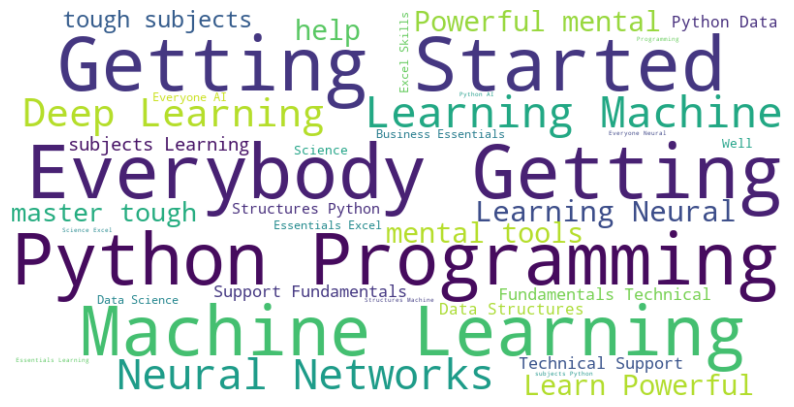

In [40]:
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
coursera_completo.to_csv("./Datasets_normalizados/coursera_normalizado.csv")

Importamos el dataset de edx

In [43]:
edx = pd.read_csv("./Datasets/edx_courses.csv")

Chequeamos su composicion

In [44]:
edx.head()

,title,summary,n_enrolled,course_type,institution,instructors,Level,subject,language,subtitles,course_effort,course_length,price,course_description,course_syllabus,course_url
0,How to Learn Online,Learn essential strategies for successful onli...,"124,980",Self-paced on your time,edX,Nina Huntemann-Robyn Belair-Ben Piscopo,Introductory,Education & Teacher Training,English,English,2–3 hours per week,2 Weeks,FREE-Add a Verified Certificate for $49 USD,"Designed for those who are new to elearning, t...",Welcome - We start with opportunities to meet ...,https://www.edx.org/course/how-to-learn-online
1,Programming for Everybody (Getting Started wit...,"This course is a ""no prerequisite"" introductio...","293,864",Self-paced on your time,The University of Michigan,Charles Severance,Introductory,Computer Science,English,English,2–4 hours per week,7 Weeks,FREE-Add a Verified Certificate for $49 USD,This course aims to teach everyone the basics ...,NaN,https://www.edx.org/course/programming-for-eve...
2,CS50's Introduction to Computer Science,An introduction to the intellectual enterprise...,"2,442,271",Self-paced on your time,Harvard University,David J. Malan-Doug Lloyd-Brian Yu,Introductory,Computer Science,English,English,6–18 hours per week,12 Weeks,FREE-Add a Verified Certificate for $90 USD,"This is CS50x , Harvard University's introduct...",NaN,https://www.edx.org/course/cs50s-introduction-...
3,The Analytics Edge,"Through inspiring examples and stories, discov...","129,555",Instructor-led on a course schedule,Massachusetts Institute of Technology,Dimitris Bertsimas-Allison O'Hair-John Silberh...,Intermediate,Data Analysis & Statistics,English,English,10–15 hours per week,13 Weeks,FREE-Add a Verified Certificate for $199 USD,"In the last decade, the amount of data availab...",NaN,https://www.edx.org/course/the-analytics-edge
4,Marketing Analytics: Marketing Measurement Str...,This course is part of a MicroMasters® Program,"81,140",Self-paced on your time,"University of California, Berkeley",Stephan Sorger,Introductory,Computer Science,English,English,5–7 hours per week,4 Weeks,FREE-Add a Verified Certificate for $249 USD,Begin your journey in a new career in marketin...,NaN,https://www.edx.org/course/marketing-analytics...


In [45]:
edx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 975 entries, 0 to 974
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   title               975 non-null    object
 1   summary             922 non-null    object
 2   n_enrolled          855 non-null    object
 3   course_type         975 non-null    object
 4   institution         975 non-null    object
 5   instructors         972 non-null    object
 6   Level               975 non-null    object
 7   subject             975 non-null    object
 8   language            975 non-null    object
 9   subtitles           972 non-null    object
 10  course_effort       975 non-null    object
 11  course_length       975 non-null    object
 12  price               975 non-null    object
 13  course_description  935 non-null    object
 14  course_syllabus     414 non-null    object
 15  course_url          975 non-null    object
dtypes: object(16)
memory usage

Dropeamos las columnas que no sirven

In [46]:
edx.drop(columns=["summary","course_type","institution","instructors","course_effort","course_description","course_syllabus","course_url"],inplace=True)

In [47]:
edx.columns

Index(['title', 'n_enrolled', 'Level', 'subject', 'language', 'subtitles',
       'course_length', 'price'],
      dtype='object')

Chequeamos como esta compuesto el precio

In [48]:
edx[["price"]]

,price
0,FREE-Add a Verified Certificate for $49 USD
1,FREE-Add a Verified Certificate for $49 USD
2,FREE-Add a Verified Certificate for $90 USD
3,FREE-Add a Verified Certificate for $199 USD
4,FREE-Add a Verified Certificate for $249 USD
...,...
970,FREE-Add a Verified Certificate for $25 USD
971,FREE-Add a Verified Certificate for $139 USD
972,FREE-Add a Verified Certificate for $139 USD
973,FREE-Add a Verified Certificate for $25 USD


extraemos solo los digitos de la columna

In [49]:
edx['price'] = edx['price'].str.extract(r"(\d+)").astype(float)

Chequeamos si existen cursos no pagos. No, no existen. En udemy se paga por el certificado al finalizar

In [50]:
edx[edx["price"]<10]

,title,n_enrolled,Level,subject,language,subtitles,course_length,price
6,Leading High-Performing Teams,"32,847",Intermediate,Communication,English,English,10 Weeks,5.0
136,Design Thinking and Creativity for Innovation,"47,549",Intermediate,Business & Management,English,English,10 Weeks,5.0
237,Tourism and Travel Management,"38,503",Introductory,Business & Management,English,English,7 Weeks,5.0
417,Solid Waste Management,"7,668",Introductory,Environmental Studies,English,English,6 Weeks,5.0
458,Unlocking Investment and Finance in Emerging M...,"29,171",Introductory,Economics & Finance,English,English,4 Weeks,5.0
466,e-Learning on Digital Agriculture,"6,238",Introductory,Environmental Studies,English,English,5 Weeks,5.0
564,The Future of Work: Preparing for Disruption,"43,125",Introductory,Economics & Finance,English,"اللغة العربية, English, Español, Français, Рус...",5 Weeks,5.0


Dropeamos los valores nulos

In [51]:
edx.dropna(inplace=True)

Ordenamos el dataframe con respecto a la mayor cantidad de personas enlistadas. Pero nos damos cuenta que estan formateadas mal ya que tienen ","

In [52]:
edx.sort_values("n_enrolled",ascending=False)

,title,n_enrolled,Level,subject,language,subtitles,course_length,price
412,Introduction to Aeronautical Engineering,"99,971",Introductory,Engineering,English,English,7 Weeks,50.0
344,Computer Graphics,"98,553",Intermediate,Computer Science,English,"English, 中文",6 Weeks,99.0
261,Introducción a la gestión de proyectos,"98,517",Introductory,Business & Management,Español,Español,5 Weeks,50.0
329,How to Code: Simple Data,"98,113",Introductory,Computer Science,English,English,7 Weeks,125.0
82,Introduction to Corporate Finance,"98,093",Introductory,Business & Management,English,English,4 Weeks,225.0
...,...,...,...,...,...,...,...,...
783,Globalization: Past and Future,"10,127",Introductory,History,English,"English, Русский",4 Weeks,25.0
505,Digital Transformation in Business,"10,118",Advanced,Business & Management,English,English,7 Weeks,214.0
923,Age of Sustainable Development,"10,019",Intermediate,Social Sciences,English,"English, Português, Русский",14 Weeks,49.0
29,IELTS Academic Test Preparation,"1,103,777",Introductory,Communication,English,English,8 Weeks,99.0


remplazamos las comas con vacio y cambiamos el datatype a Int

In [53]:
edx["n_enrolled"] = edx["n_enrolled"].str.replace(",","")
edx["n_enrolled"] = edx["n_enrolled"].astype("Int64")

Ahora si, ordenamos por mayor cantidad de personas enlistadas

In [54]:
edx.sort_values("n_enrolled",ascending=False)

,title,n_enrolled,Level,subject,language,subtitles,course_length,price
2,CS50's Introduction to Computer Science,2442271,Introductory,Computer Science,English,English,12 Weeks,90.0
29,IELTS Academic Test Preparation,1103777,Introductory,Communication,English,English,8 Weeks,99.0
31,TOEFL® Test Preparation: The Insider’s Guide,1022489,Introductory,Communication,English,English,6 Weeks,49.0
23,CS50's Web Programming with Python and JavaScript,698950,Intermediate,Computer Science,English,English,12 Weeks,90.0
64,Introduction to Linux,642088,Introductory,Computer Science,English,English,14 Weeks,199.0
...,...,...,...,...,...,...,...,...
794,General Overview of Cannabis and the Industry’...,5048,Introductory,Environmental Studies,English,English,4 Weeks,199.0
787,Tools for Academic Engagement in Public Policy,5035,Introductory,Communication,English,English,3 Weeks,199.0
676,Enterprise Selling,5020,Introductory,Business & Management,English,English,6 Weeks,149.0
722,Deep Learning Essentials,5018,Intermediate,Computer Science,English,English,5 Weeks,149.0


Generamos la columna de ganancia de cada curso multiplicando la cantidad de personas y el precio. Este dato es el POTENCIAL de GANANCIA de cada curso. Ya que no todos los alumnos anotados a cursos los terminan o pagan el certificado. De ahora en mas, utilizare ganancia pero, con ese termino, me refiero al POTENCIAL de ganacia de cada curso

In [55]:
edx["ganancia_curso"] = edx["n_enrolled"] * edx["price"]

Generamos un dataset que nos diga la cantidad de personas enlistadas con respecto al precio del curso

In [56]:
edx_pr = edx[["n_enrolled","price"]]

Agrupamos segun precio y sumamos la cantidad de alumnos

In [57]:
edx_price = edx_pr.groupby("price")["n_enrolled"].mean()

In [58]:
edx_price = edx_price.to_frame().reset_index()

Aqui tenemos el dataframe, la mayor cantidad de personas paga cursos que valen 49.0 dolares

In [59]:
edx_price.sort_values("n_enrolled",ascending=False)

,price,n_enrolled
17,90.0,816114.75
7,40.0,203345.0
37,350.0,151757.333333
13,69.0,104760.0
36,300.0,102120.0
21,125.0,98009.25
18,99.0,78987.68254
14,70.0,78327.0
29,199.0,62964.917808
6,39.0,62099.777778


Ahora hacemos rangos de precios

In [60]:
rangos = [
    (1, 50),
    (51, 100),
    (101, 150),
    (151, 200),
    (201, 250),
    (251, 300),
    (301, 350),
    (351, 400),
    (401, 450)
]


Generamos una nueva columna donde esten los rangos de precio

In [61]:
edx_price['price_range'] = pd.cut(edx_price['price'], bins=[r[0]-1 for r in rangos] + [rangos[-1][1]], labels=[f'{r[0]}-{r[1]}' for r in rangos])

Agrupamos por el rango de precio

In [62]:
edx_price = edx_price.groupby('price_range')['n_enrolled'].mean().reset_index()


Sigue indicandonos que la mayor cantidad de personas se anota a cursos entre 1 y 50 dolares

In [63]:
edx_price.sort_values("n_enrolled",ascending=False)

,price_range,n_enrolled
6,301-350,151757.333333
1,51-100,126940.30873
5,251-300,63690.7
0,1-50,45790.110452
2,101-150,45048.558012
4,201-250,40082.871377
3,151-200,33858.567772
7,351-400,30915.333333
8,401-450,24108.0


Generamos un dataframe con la cantidad de personas anotadas a un curso y el largo del curso

In [64]:
edx_len = edx[["n_enrolled","course_length"]]

Agrupamos por longitud de curso y sumamos la cantidad de personas anotadas

In [65]:
edx_lenght = edx_len.groupby("course_length")["n_enrolled"].mean()

In [66]:
edx_lenght = edx_lenght.to_frame().reset_index()

Los cursos que tienen 6 semanas de duracion son los que mas personas anotadas tienen

In [67]:
edx_lenght.sort_values("n_enrolled",ascending=False)

,course_length,n_enrolled
3,12 Weeks,184696.0625
2,11 Weeks,117884.833333
5,14 Weeks,80251.066667
16,8 Weeks,75932.753247
7,16 Weeks,74775.666667
6,15 Weeks,71559.888889
4,13 Weeks,63783.166667
17,9 Weeks,56867.5
1,10 Weeks,55846.55
14,6 Weeks,44720.44186


Ahora, generamos rangos de semanas

In [68]:
rangos_semanas = [
    (1, 4),
    (5, 8),
    (9, 12),
    (13, 16),
    (17, 20)
]

Generamos una funcion que nos saque el rango de semanas

In [69]:
def rango_semanas(semanas):
    for r in rangos_semanas:
        if r[0] <= semanas <= r[1]:
            return f"{r[0]}-{r[1]}"
    return np.nan

edx_lenght["rango_semanas"] = edx_lenght["course_length"].str.extract("(\d+)").astype(int).applymap(rango_semanas)

edx_lenght = edx_lenght.groupby("rango_semanas")["n_enrolled"].sum().reset_index()

Obtenemos que la cantidad de personas anotadas a cursos de entre 5 y 8 semanas son los que mas tienen

In [70]:
edx_lenght.sort_values("n_enrolled",ascending=False)

,rango_semanas,n_enrolled
4,9-12,415294.945833
1,13-16,290369.788889
3,5-8,207907.300807
0,1-4,115531.274038
2,17-20,50695.0


Ahora queremos saber que duracion de curso genera mas ganancia

In [71]:
edx_ganancia_length = edx[["course_length","ganancia_curso"]]

Agrupamos segun largo de curso y a la suma le sacamos la media y notamos que los cursos de entre 12 y 16 semanas son los que en promedio generan mas ingresos. Esto, ya que al ser mas largos, se permiten cobrar mas y, a pesar de que no son el rango de semanas que mas personas tienen, si son el segundo rango de semanas, por lo que generan mas ingresos

In [72]:
edx_ganancia_length.groupby("course_length")["ganancia_curso"].mean().sort_values(ascending=False).round(2)

course_length
12 Weeks    20684460.19
11 Weeks     18199279.0
14 Weeks    14502762.13
16 Weeks    12842624.67
13 Weeks    10912571.33
15 Weeks    10437815.06
8 Weeks      6378280.99
9 Weeks      6123944.45
10 Weeks     6022517.39
6 Weeks      5225643.35
5 Weeks      4231392.68
4 Weeks       4161136.4
7 Weeks      3639283.31
18 Weeks      2897174.0
2 Weeks      1661496.12
17 Weeks      1366181.0
3 Weeks      1251046.35
1 Weeks      1133301.29
Name: ganancia_curso, dtype: Float64

In [73]:
edx_ganancia_length['week_range'] = edx_ganancia_length['course_length'].str.extract('(\d+)').astype(int).applymap(rango_semanas)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11528\1305655694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  edx_ganancia_length['week_range'] = edx_ganancia_length['course_length'].str.extract('(\d+)').astype(int).applymap(rango_semanas)


In [74]:
edx_ganancia_length.groupby("week_range")["ganancia_curso"].sum().sort_values(ascending=False)

week_range
5-8      2195534537.0
9-12     1375378680.0
1-4       728664940.0
13-16     625009027.0
17-20      10057703.0
Name: ganancia_curso, dtype: Float64

Generamos un dataframe que contenga el nivel y la cantidad de personas anotadas

In [75]:
edx_lev = edx[["Level","n_enrolled"]]

Agrupamos por nivel y sumamos la cantidad de personas

In [76]:
edx_level = edx_lev.groupby("Level")["n_enrolled"].sum()

In [77]:
edx_level = edx_level.to_frame().reset_index()

Como vemos, los cursos introductorios son los que mas personas tienen menos que los Avanzados son los que menos. Esto podria indicar que la tasa de personas que completan cursos es baja

In [78]:
edx_level.sort_values("n_enrolled",ascending=False)

,Level,n_enrolled
2,Introductory,32350969
1,Intermediate,10076928
0,Advanced,2962732


Ahora nos fijamos la ganancia promedio por nivel y vemos que los avanzados, a pesar de que son los que menos personas tienen, son los que mas dinero en promedio consiguen

In [79]:
edx[["Level","ganancia_curso"]].groupby("Level")["ganancia_curso"].mean().sort_values(ascending=False).round(2)

Level
Advanced        9418564.08
Introductory    5684744.83
Intermediate     4884769.6
Name: ganancia_curso, dtype: Float64

In [80]:
edx["Level"].value_counts()

Level
Introductory    541
Intermediate    236
Advanced         75
Name: count, dtype: int64

Generamos un dataframe segun idioma y personas anotadas a los cursos

In [81]:
edx_lan = edx[["language","n_enrolled"]]

Agrupamos segun idioma y sumamos la cantidad de personas

In [82]:
edx_language = edx_lan.groupby("language")["n_enrolled"].sum()

In [83]:
edx_language = edx_language.to_frame().reset_index()

Chequeamos que Ingles es el idioma que mas personas tiene

In [84]:
edx_language.sort_values("n_enrolled",ascending=False)

,language,n_enrolled
1,English,41068628
2,Español,3704975
4,Italiano,281585
3,Français,161848
7,日本語,62757
6,中文,56158
5,Português,44021
0,Deutsch,10657


Un dato interesante es que la suma de todos los idiomas diferentes a Ingles, no alcanza para si quiera acercarse a la cantidad de personas anotadas a cursos en ingles

Ahora generamos un dataframe que contenga todos los datos que al menos tengan Español, ya sea en idioma o subtitulos

In [85]:
cursos_español = edx[edx['language'].str.contains('Spanish', na=False) | edx['subtitles'].str.contains('Español', na=False, case=False, regex=False)]

La cantidad de cursos avanzados en español es nula

In [86]:
cursos_español[cursos_español["Level"] == "Advanced"]

,title,n_enrolled,Level,subject,language,subtitles,course_length,price,ganancia_curso
186,Excel avanzado: importación y análisis de datos,47184,Advanced,Data Analysis & Statistics,Español,Español,8 Weeks,75.0,3538800.0
433,Información financiera y su análisis,5473,Advanced,Economics & Finance,Español,Español,4 Weeks,49.0,268177.0


Mientras que los de cursos Introductorios hay suficientes

In [87]:
cursos_español[cursos_español["Level"] == "Introductory"].shape

(121, 9)

Generamos una variable que contenga todos los alumnos de cursos que almenos tenga español

In [88]:
almenos_español = cursos_español['n_enrolled'].sum()

In [89]:
almenos_español

5470091

Y se la restamos a la cantidad de alumnos que solo estan anotados a cursos en español


In [90]:
almenos_español - edx_language["n_enrolled"].iloc[2]

1765116

El resultado obviamente no es 100% correcto ya que seguramente mucha gente que este anotada a cursos que tienen español como subtitulos sea de otra habla. Pero nos permite ver que hay un mercado de personas que recurren a la utilizacion de subtitulos en cursos que nos son de su idioma original. Esto es debido a la falta de cursos de calidad y nivel en Español.

Se genera una variable que contenga los temas y las ganancias de cada curso

In [91]:
subject_edx = edx[["subject","ganancia_curso"]]

Agrupamos por tema y sacamos la media de ganancias de cada tema.

In [92]:
subject_edx.groupby("subject")["ganancia_curso"].mean().sort_values(ascending=False).head(5).round(2)

subject
Architecture                  10680593.25
Computer Science              10611107.03
Communication                  9187644.63
Data Analysis & Statistics     8745152.85
Business & Management          6329525.54
Name: ganancia_curso, dtype: Float64

Notamos que Los 2 con mayor generacion de ganancia en el mercado son los de Arquitectura y Computer Science

Pero, cuando vemos el top 5 de contenidos generados para cada tema, notamos que Arquitectura no esta. No hay suficientes cursos de Arquitectura.

In [93]:
subject_edx["subject"].value_counts()

subject
Computer Science                150
Business & Management           144
Humanities                       62
Data Analysis & Statistics       60
Engineering                      49
Social Sciences                  46
Economics & Finance              37
Communication                    35
Biology & Life Sciences          34
Language                         27
Education & Teacher Training     26
Math                             23
Medicine                         23
Physics                          17
History                          17
Environmental Studies            13
Art & Culture                    10
Health & Safety                   9
Law                               9
Science                           9
Design                            8
Electronics                       7
Food & Nutrition                  6
Philosophy & Ethics               6
Music                             6
Chemistry                         5
Energy & Earth Sciences           5
Architecture        

Y si analizamos la cantidad de personas en que esta anotada a cursos de Arquitectura, tampoco entra en el top 5

In [94]:
edx[["subject","n_enrolled"]].groupby("subject")["n_enrolled"].sum().sort_values(ascending=False)

subject
Computer Science                12447737
Business & Management            6958064
Communication                    4641327
Data Analysis & Statistics       4264412
Humanities                       3504140
Social Sciences                  1844379
Biology & Life Sciences          1763832
Engineering                      1396839
Language                         1063257
Medicine                          989765
Math                              963753
Economics & Finance               835907
Education & Teacher Training      706532
Physics                           580559
History                           530724
Architecture                      456611
Environmental Studies             339713
Health & Safety                   325912
Law                               291436
Art & Culture                     282312
Chemistry                         197535
Food & Nutrition                  197479
Literature                        191592
Science                           160697
Philosop

In [95]:
edx[edx["subject"]== "Architecture"]

,title,n_enrolled,Level,subject,language,subtitles,course_length,price,ganancia_curso
30,The Architectural Imagination,406181,Introductory,Architecture,English,English,10 Weeks,99.0,40211919.0
210,Sustainability in Architecture: An Interdiscip...,31352,Intermediate,Architecture,English,English,4 Weeks,50.0,1567600.0
298,What do Architects and Urban Planners do?,11046,Introductory,Architecture,English,English,3 Weeks,49.0,541254.0
534,Circular Economy for a Sustainable Built Envir...,8032,Intermediate,Architecture,English,English,6 Weeks,50.0,401600.0


Generamos el wordcloud de el dataset edx

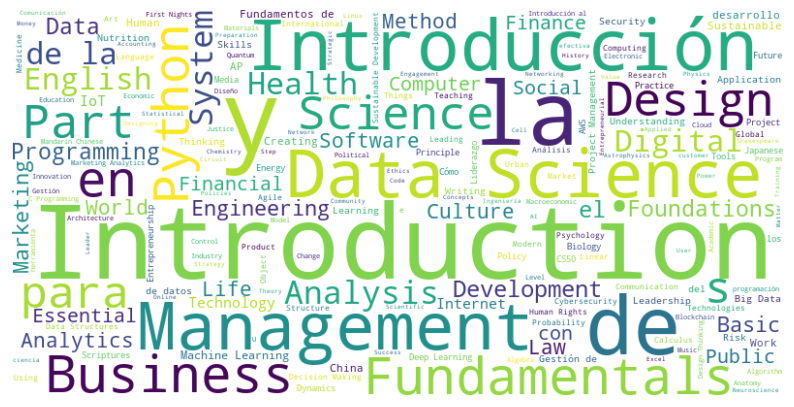

In [96]:
edx_titulos = " ".join(edx["title"])
wordcloudedx = WordCloud(width=800, height=400, background_color='white').generate(edx_titulos)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloudedx, interpolation='bilinear')
plt.axis('off')
plt.show()

In [97]:
edx.to_csv("./Datasets_normalizados/edx_normalizado.csv")

OSError: Cannot save file into a non-existent directory: 'SQL'

Importamos el dataset de Udemy

In [ ]:
udemy = pd.read_csv("./Datasets/udemy_courses.csv")

Chequeamos su composicion

In [ ]:
udemy.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


Chequeamos su cantidad,nulos y datatype

In [ ]:
udemy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


Generamos una descripcion de las variables numericas

In [ ]:
udemy.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


Creamos la columna de ganancia por curso

In [ ]:
udemy["ganancia_curso"] = udemy["num_subscribers"] * udemy["price"]

Generamos un dataframe con la cantidad de subscriptores y el booleano sobre si es pago o no un curso

In [ ]:
udemy_paid = udemy[["is_paid","num_subscribers"]]

Agrupamos por el booleano y sumamos la cantidad de subscriptores

In [ ]:
udemy_paid = udemy_paid.groupby(by="is_paid")["num_subscribers"].sum()

In [ ]:
udemy_paid = udemy_paid.to_frame().reset_index()

Como podemos observar, el hecho de que sea pago, incrementa la cantidad de subscriptores

In [ ]:
udemy_paid

,is_paid,num_subscribers
0,False,3575525
1,True,8183595


<Axes: xlabel='is_paid', ylabel='num_subscribers'>

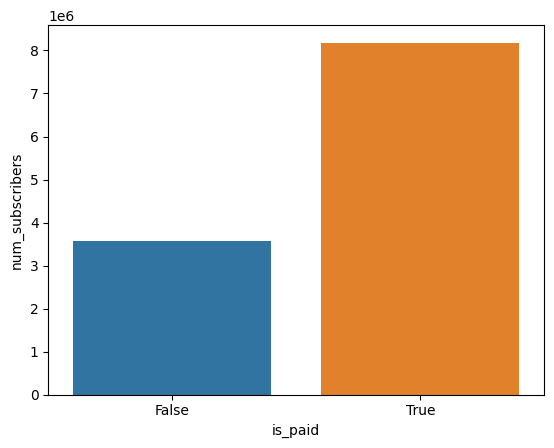

In [ ]:
sns.barplot(data=udemy_paid,x="is_paid",y="num_subscribers")

In [ ]:

fig, ax = plt.subplots()  
sns.barplot(data=udemy_paid, x="num_subscribers", y="is_paid", saturation=1, ax=ax)
sns.despine(left=True, bottom=True)

NameError: name 'plt' is not defined

In [ ]:
udemy_gratis = udemy[udemy["price"]== 0]

In [ ]:
udemy_pago = udemy[udemy["price"] != 0]

In [ ]:
usuarios_gratis = udemy_gratis["num_subscribers"].sum()

In [ ]:
usuarios_pagos=  udemy_pago["num_subscribers"].sum()

Generamos la tasa de conversion de alumnos. Esto nos da la idea de que cada 1 alumno gratuito, hay dos que no lo son

In [ ]:
(usuarios_pagos / usuarios_gratis) * 100

228.87813677711665

Creamos un dataframe que nos diga la ganancia por tema

In [ ]:
subject_udemy = udemy[["subject","ganancia_curso"]]

Observamos que en este caso Web Development es el que mas ganancia deja, seguida de diseño grafico

In [ ]:
subject_udemy.groupby("subject")["ganancia_curso"].mean().sort_values(ascending=False)

subject
Web Development        525703.145833
Graphic Design         127666.948590
Business Finance       103544.196653
Musical Instruments     78469.198529
Name: ganancia_curso, dtype: float64

Pero como observamos en la cantidad de cursos. El area de diseño grafico es el que menos cantidad de cursos tiene

In [ ]:
subject_udemy = subject_udemy["subject"].value_counts().to_frame().reset_index()

In [ ]:
subject_udemy

,subject,count
0,Web Development,1200
1,Business Finance,1195
2,Musical Instruments,680
3,Graphic Design,603


In [ ]:
colores = ["#4c81bf" if subject == "Web Development" else "#a6a6a5" for subject in subject_udemy['subject']]

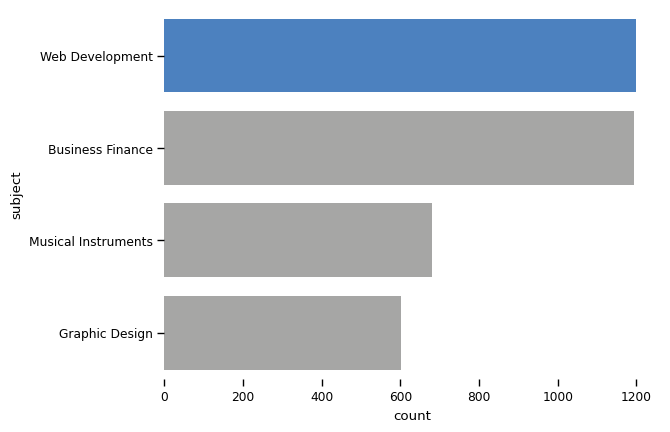

In [ ]:
colores = ["#4c81bf" if subject == "Web Development" else "#a6a6a5" for subject in subject_udemy['subject']]
sns.barplot(data=subject_udemy,x="count",y="subject",palette=colores,linewidth=0,saturation=1)
sns.despine(left=True,bottom=True)


Creamos el wordcloud de los titulos de Udemy

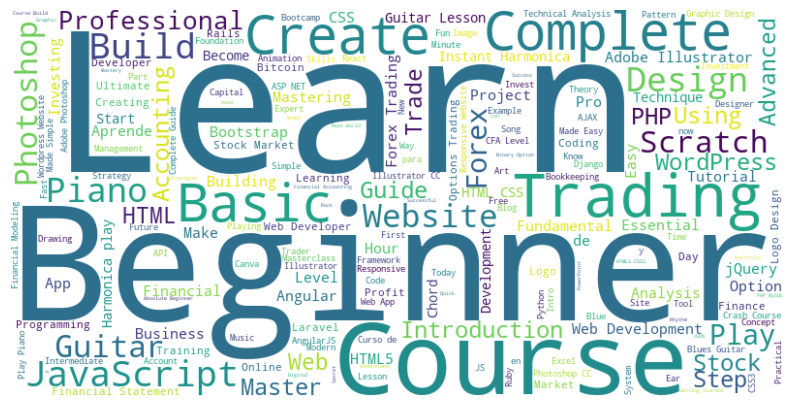

In [ ]:
udemy_titulos = " ".join(udemy["course_title"])
wordcloududemy = WordCloud(width=800, height=400, background_color='white').generate(udemy_titulos)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloududemy, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
udemy.to_csv("./SQL/udemy_normalizado.csv")